In [1]:
import numpy as np 
%matplotlib inline
import matplotlib.pylab as plt

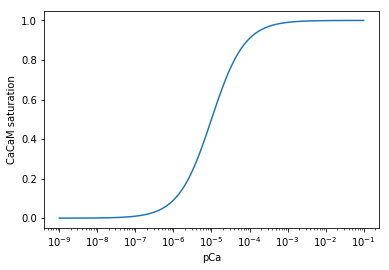

In [2]:
pCas = np.linspace(-9,-1,100)
pCas = 10**pCas
KD = 10**-5
CaBs = 1/ (1 + KD/pCas)

plt.plot(pCas,CaBs)
plt.xscale('log')
plt.xlabel("pCa")
plt.ylabel("CaCaM saturation")
plt.gcf().savefig("kca.png",dpi=300)

## SA 2 figure
${\frac {1}{x\sigma {\sqrt {2\pi }}}}\ e^{-{\frac {\left(\ln x-\mu \right)^{2}}{2\sigma ^{2}}}}$

In [3]:
# healthy
ts = np.linspace(0.1,1,100)
mu = 0.00
s = 3.


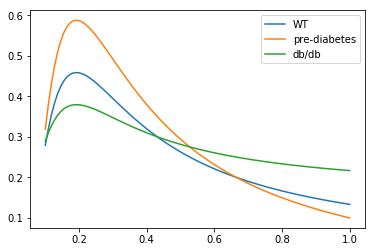

In [4]:
def func(t,mu,s,amp=1.,shift=0.):
    expon = np.log(t) - mu
    expon *= expon
    expon *= - expon/(2 * s*s)
    lhs = 1/(t *s *np.sqrt(2*np.pi))
    return amp*lhs * np.exp(expon) + shift

plt.plot(ts, func(ts,mu,s),label="WT")
plt.plot(ts, func(ts,mu,s,amp=1.5,shift=-0.1),label="pre-diabetes"  )
plt.plot(ts, func(ts,mu,s,amp=0.5,shift=0.15),label="db/db")
plt.legend(loc=0)
plt.gcf().savefig("test.png",dpi=300)

### Effective concentration

In [5]:
zeta = 0.35 #persistence length [nm] 
lenPerResi = 0.34 # [nm]
D = 53 *lenPerResi   # Residue between CaMBR C termimus (R414) and AID N-terminus (I467) is 52 a.a.
                     # thus the distance should be 3.4 x 53  
L = 8 * lenPerResi  # residue number between C-terminal of DH and N terminus of AID (DH is absorbed on CaM's surface)

def G_DZL(zeta,D,L):
    prefac = np.sqrt(3/(4*np.pi*zeta*L)) 
    prefac =prefac*prefac*prefac
    expon = -3*D*D/(4*zeta*L)
    return prefac * np.exp(expon)


Text(0,0.5,'P')

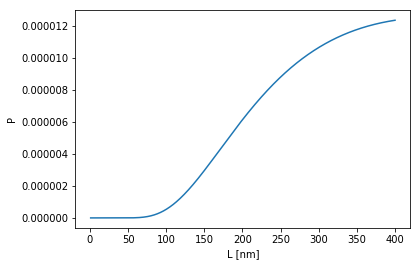

In [6]:
Ls = np.linspace(1,400,1000)
plt.plot(Ls, G_DZL(zeta,D,Ls))
#plt.plot(Ls, G_DZL(zeta*0.1,D,Ls))
plt.xlabel("L [nm]")
plt.ylabel("P")

### Concentration


In [7]:
nm3_to_L =1e-24

#### Check against water

In [8]:
V= 3.2e-1**3  # 1.4*~2
c = (1/6.022e23) / (V*nm3_to_L) # [mol/L]
print (c, " [M]")

50.67681521919627  [M]


#### Eff. conc for chained ligand 

In [9]:
# If 100 pct probability, G=1 in the volume that a binding site 'feels'
Nsite_res = 5 # number of residues which define the volume of binding site
V_bs = (Nsite_res*.34) * (np.pi * (.34/2.)**2)  # num_res * 3.4 nm/res for height, area based on radius of aa/2 res
G = 1.
cLim = G/6.022e23 / (V_bs * nm3_to_L)
print (cLim, " [M]")


10.758769719786205  [M]


### Troponin C 

Text(0.5,0,'#/a.a.')

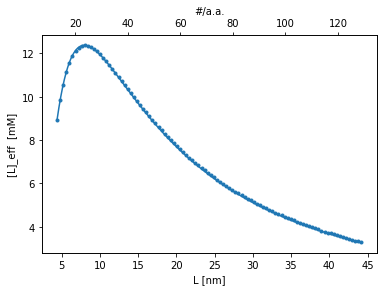

In [10]:
M_to_mM=1e3
M_to_uM=1e6
Ang_to_nm=1e-1
zeta = 1 # nm, persistense length
D = 40. *Ang_to_nm   # binding site distance [nm]
res = 13   # Residues 147-134 
Ang_per_res = 3.4 # [A]
Lmin = res*Ang_per_res * Ang_to_nm  # tether length [nm]
Lmax = Lmin * 10 
Ls = np.linspace(Lmin,Lmax,1000)
fig, ax1 = plt.subplots()
ax1.plot(Ls, G_DZL(zeta,D,Ls)* cLim*M_to_mM)
ax1.set_xlabel("L [nm]")
ax1.set_ylabel("[L]_eff  [mM]")
ax2 = ax1.twiny()
L_per_res = 3.4 # [nm]
ax2.plot(Ls[::10]/(L_per_res * Ang_to_nm), G_DZL(zeta,D,Ls)[::10]* cLim*M_to_mM,'.')
ax2.set_xlabel("#/a.a.")

#### Siddiqui2016 Estimate
I get close, but not same value; WLC estimate is within a factor of two

In [11]:
# Residues 134-147, 3.4 A/res
r=(147-134)*3.4
print (r*Ang_to_nm, " [nm]")
A3_to_L = 1e-27
V = 4/3. * np.pi*r**3  * A3_to_L # V [L]
print (V, " [L]")
conc = 1/6.022e23/V
print (conc* M_to_mM, " [mM]")


4.42  [nm]
3.6170575382900657e-22  [L]
4.590963410241044  [mM]


### CN 

Assume that C terminal of CaMBR domain is nearly completely extended in order to reach inhibitory domain on calcineurin, the residue number is 53

In [12]:
# distance between CaM and AID from our simulations
wtdata=np.loadtxt('/net/share/bsu233/CaMDH/pCaNtoAID/withCaM/wt/wtdis',comments='#')
a454edata=np.loadtxt('/net/share/bsu233/CaMDH/pCaNtoAID/withCaM/a454e/a454edis',comments='#')

print (np.mean(wtdata[:,1]),np.std(wtdata[:,1]),len(wtdata[:,1]))
print (np.mean(a454edata[:,1]),np.std(a454edata[:,1]),len(a454edata[:,1]))

23.426738590909093 2.820036425820002 6600
40.32714828333334 3.93244684526361 6000


Text(0,0.5,'AID-CaM dist.($\\AA$)')

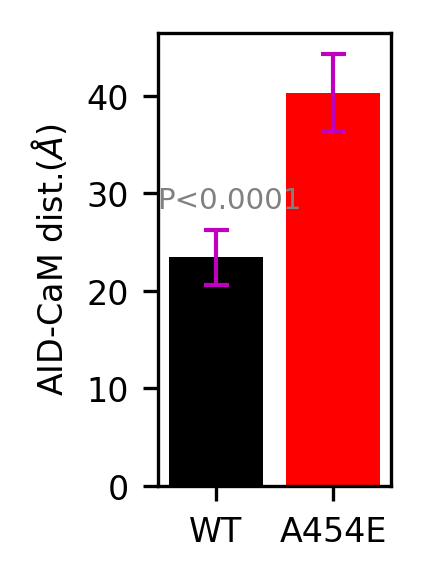

In [13]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 1,2
rcParams['figure.dpi'] =300

#P value of a454e with null hypothesis of being equal to WT 

width=0.8
plt.bar(0,np.mean(wtdata[:,1]),width,yerr=np.std(wtdata[:,1]),color="black",error_kw=dict(ecolor='m',lw=1,capsize=3,capthick=1))
plt.bar(1,np.mean(a454edata[:,1]),width,yerr=np.std(a454edata[:,1]),color='red',error_kw=dict(ecolor='m',lw=1,capsize=3,capthick=1))
plt.text(-0.5,np.mean(wtdata[:,1])+5,"P<0.0001",fontsize=7,color='grey')
plt.xticks([0,1],['WT','A454E'],fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel("AID-CaM dist.($\AA$)",fontsize=8)

In [72]:
rcParams['figure.figsize'] = 2,1
rcParams['figure.dpi'] =300
D = 66 * Ang_to_nm # Measured between Ca.387 to Ca.481 in pdb 4or9
print (D, " [nm]")
L_free = 95 * Ang_per_res * Ang_to_nm # when No CaM, the tehter length is  a.a. resid 387 to resid 481
print (L_free, " [nm]")

# For L_CaM (when CaM is bound to CaMBR), theoritically, the tether length is from C-terminl of CaMBR to 
# N terminus of AID, which should be 53. residue long, Namely, "L_CaM = 53  * Ang_per_res * Ang_to_nm"
# Here we use our simulated data
L_CaM =  4.0 #nm, from Fig 11
print (L_CaM, " [nm]")

#simlarity, when CaM is bound and DH interaction is formed, our simulated data shows that:
L_CaMDH =  2.3 # nm
print (L_CaMDH, " [nm]")

print (G_DZL(zeta,D,L_free)* cLim*M_to_mM, " [mM]")
print (G_DZL(zeta,D,L_CaM)* cLim*M_to_mM, " [mM]")
print (G_DZL(zeta,D,L_CaMDH)* cLim*M_to_mM, " [mM]")

6.6000000000000005  [nm]
32.300000000000004  [nm]
4.0  [nm]
2.3  [nm]
0.9391196081029204  [mM]
1.9837690121062426  [mM]
0.6082275697563743  [mM]


32.300000000000004
0.9391196081029204 0.6082275697563743


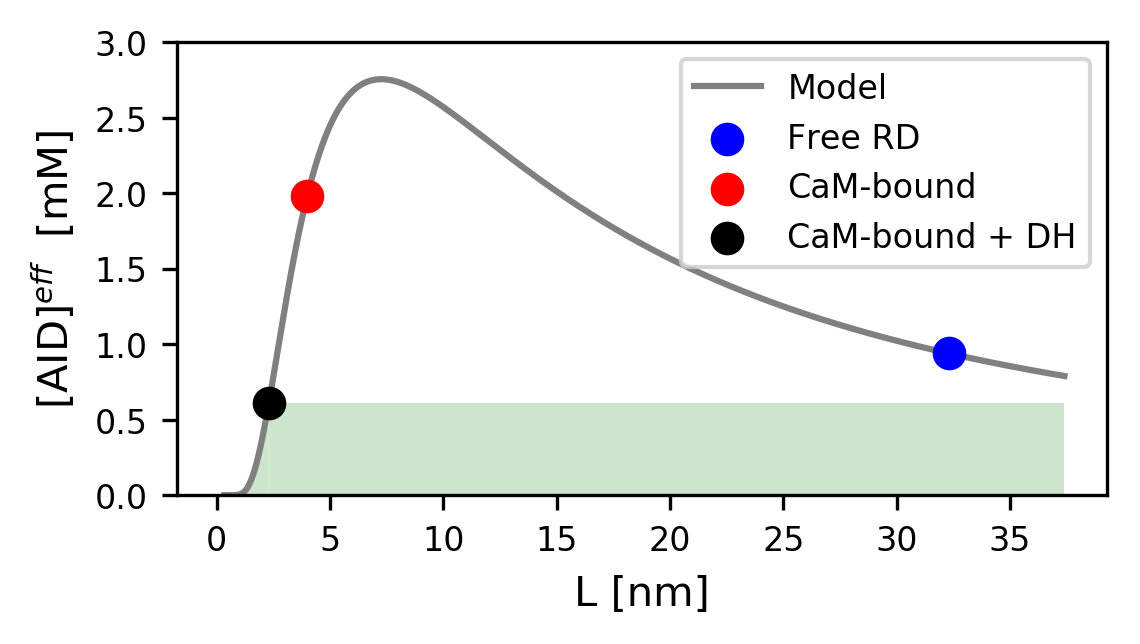

In [73]:
rcParams['figure.figsize'] = 4,2
rcParams['figure.dpi'] =300

res = 1
Lmin = res*Ang_per_res * Ang_to_nm  # tether length [nm]
res = 110
Lmax = res*Ang_per_res * Ang_to_nm  # tether length [nm] 
Ls = np.linspace(Lmin,Lmax,1000)

L_per_res = 0.34 #nm 
zeta=3

fig, ax1 = plt.subplots()
y = G_DZL(zeta,D,Ls)* cLim*M_to_mM
ax1.plot(Ls, y,'grey',label='Model')
tether_length = np.array([L_free,L_CaM,L_CaMDH])
print (tether_length[0])
conc = G_DZL(zeta,D,tether_length)* cLim*M_to_mM
ax1.scatter(tether_length[0],conc[0],color='blue',s=50,zorder=3,label='Free RD')
ax1.scatter(tether_length[1],conc[1],color='red',s=50,zorder=3,label='CaM-bound')
ax1.scatter(tether_length[2],conc[2],color='black',s=50,zorder=3,label='CaM-bound + DH')
ax1.set_xlabel("L [nm]")
ax1.legend(fontsize=8)

#ax2.tick_params(labelsize=8)
ax1.tick_params(labelsize=8)
ax1.set_ylabel("[AID]$^{eff}$  [mM]")

# Now shade the aera wher the linker length is suffcient to release AID
x1x2 = np.linspace(0.1,tether_length[2],5)
x3x4 = np.linspace(tether_length[2],37.4,5)
#x3x4 = np.linspace(tether_length[0],20.4,100)
ylimit1 = conc[2]
ylimit2 = G_DZL(zeta,D,x1x2)* cLim*M_to_mM

ax1.fill_between(x1x2,0,ylimit2,edgecolor='none',facecolor='green', alpha='0.2')
ax1.fill_between(x3x4, 0,conc[2],edgecolor='none',facecolor='green', alpha='0.2')
ax1.set_ylim([0,3])

print (conc[0],conc[2])
#ax1.set_xlim([0,60])
#plt.gcf().savefig("CN_AID_tether.png")

Here we assume that 
1. CN inhibition is based on the free AID concentration
2. the free AID concentration is determined by the 'tether' length
3. the tether length can assume two values, short versus long. 
4. The relative proportion of short versus long is determined by the probability of DH-binding to CaM. We assume DH binding is independent of AID 

$$
\begin{align}
[CaMN_{Ca,DH}]&={{1}\over{\left({\it K_{D_{Ca}}/[Ca]}+1\right)\,{\it K_{D_{DH}}/[DH]}+1}}\\
[CN_{AID}]&={{1}\over{{\it K_{D_{AID}}/[AID]}+1}} \\
[AID]_{eff} &= pCaMDH\cdot[AID]_{eff,CaM} + (1-pCaMDH)\cdot[AID]_{eff,free}
\end{align}$$


In [16]:
cas = 10**np.linspace(-10,-4,101)

def exprCaM(ca,KDDH = 1e-3 # [M]
        ):
    
    KDCa = 1e-6 # [M]
    dh = 1e-3 # [M] - I don't think we need to fiddle with this concentration
    denom = KDCa/ca + 1
    denom = denom *(KDDH/dh)
    denom = denom + 1 
    return 1/denom
  
def exprCNInact(
      pCaMDH,# in [0,1]
      AIDeff_pCaMDH=0.01e-3, # [M] 
      AIDeff_free=2e-3):
    
    KDAID = 5e-4 # [M]
    #AID_eff = AIDeff_pCaMDH*pCaMDH
    #AID_eff += - AIDeff_pCaMDH*(1-pCaMDH)
    AID_eff = AIDeff_pCaMDH*pCaMDH + AIDeff_free*(1-pCaMDH)
    denom = KDAID/AID_eff + 1
    return 1/denom    

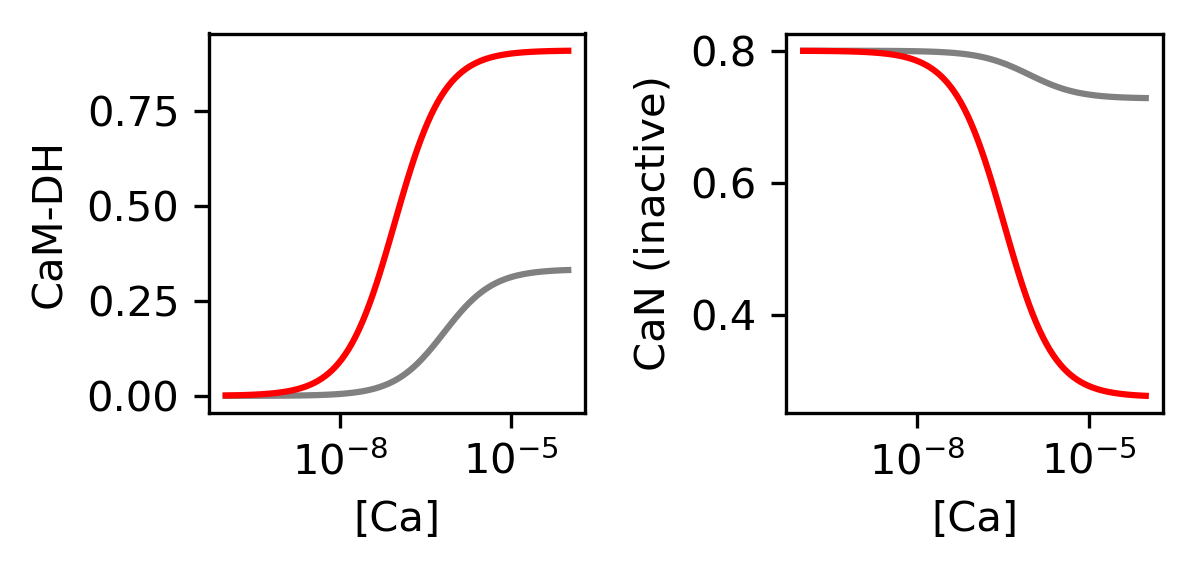

In [17]:
# Determine CaMDH 
plt.subplot(121)
camWeak = exprCaM(cas,KDDH=2e-3)
plt.plot(cas,camWeak,'gray',label='weak binding')
camStrong = exprCaM(cas,KDDH=0.1e-3)
plt.plot(cas,camStrong,'red',label='strong binding')
plt.xscale('log')
plt.ylabel("CaM-DH")
plt.xlabel("[Ca]")

if 1: 
    plt.subplot(122)
    plt.plot(cas,exprCNInact(camWeak),'gray',label='weak binding')
    plt.plot(cas,exprCNInact(camStrong),'red',label='strong binding')
    plt.xscale('log')
    plt.ylabel("CaN (inactive)")
    plt.xlabel("[Ca]")

else: 
    plt.subplot(122)
    plt.plot(cas,1-exprCNInact(camWeak),'gray',label='weak binding')
    plt.plot(cas,1-exprCNInact(camStrong),'red',label='strong binding')
    plt.xscale('log')
    plt.ylabel("CaN (active)")
    plt.xlabel("[Ca]")



plt.tight_layout()
